In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
my_data = pd.read_csv('2017_jun_final.csv')
print(my_data.head(4))

   N           Должность Язык.программирования Специализация  \
0  1  Junior QA engineer                   NaN     Manual QA   
1  2  Junior QA engineer                   NaN     Manual QA   
2  3   Software Engineer               C#/.NET           NaN   
3  4   Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1                               130  Харьков  свыше 1000 человек  ...   
2                               800     Киев     до 1000 человек  ...   
3                               400 

In [7]:
print(my_data.shape)

(8704, 25)


In [8]:
print(my_data.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [9]:
print(my_data.isnull().sum()/len(my_data))

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [15]:
columns = my_data.columns[my_data.isna().any()]

drop_columns = [col for col in columns if col != 'Язык.программирования']

my_data = my_data.drop(columns=drop_columns)
my_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,средний,12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,женский,22,Высшее,False,ниже среднего,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Днепр,свыше 1000 человек,Аутсорсинговая,мужской,34,Высшее,False,продвинутый,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


In [18]:
my_data.replace(1, np.nan, inplace=True)
my_data.dropna(inplace=True)
my_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
3,4.0,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5.0,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
8,9.0,Junior Software Engineer,Java,0.5,0.5,550,550,Харьков,свыше 1000 человек,Аутсорсинговая,женский,23,Высшее,False,средний,12/06/2017 13:04:28,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,0.5,0.5,550
15,16.0,Senior Software Engineer,JavaScript,5,5,2900,300,Винница,до 200 человек,Аутсорсинговая,мужской,26,Высшее,False,продвинутый,12/06/2017 13:06:50,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,5.0,5.0,2900
18,19.0,Senior Software Engineer,C++,4,0.5,3300,600,Киев,до 1000 человек,Аутсорсинговая,мужской,22,Высшее,True,выше среднего,12/06/2017 13:07:10,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,4.0,0.5,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,8685.0,Senior Software Engineer,Java,4,0.5,2500,800,Другой,до 10 человек,Аутстаффинговая,мужской,26,Высшее,False,средний,12/07/2017 11:55:30,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,0.5,2500
8685,8686.0,Senior Software Engineer,PHP,5,5,2950,600,Запорожье,до 1000 человек,Продуктовая,мужской,30,Высшее,False,ниже среднего,12/07/2017 11:55:50,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,5.0,5.0,2950
8686,8687.0,Software Engineer,JavaScript,3,1.5,1650,500,Житомир,до 50 человек,Стартап,мужской,23,Высшее,True,выше среднего,12/07/2017 12:03:30,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3.0,1.5,1650
8689,8690.0,Software Engineer,PHP,3,меньше 3 месяцев,1600,1200,Киев,до 10 человек,Продуктовая,мужской,25,Высшее,False,ниже среднего,12/07/2017 12:31:12,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,3.0,0.0,1600


In [20]:
my_data.shape

(3745, 20)

In [21]:
python_data = my_data[my_data["Язык.программирования"] == "Python"]
python_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
68,69.0,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.50,0.50,900
87,88.0,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.50,0.50,600
114,115.0,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.50,0.50,685
162,163.0,Junior Software Engineer,Python,0.5,0.5,500,0,Винница,до 200 человек,Аутсорсинговая,мужской,20,Техникум / Колледж,True,ниже среднего,12/06/2017 13:21:08,Mozilla/5.0 (Linux; Android 7.1.2; LG-D802 Bui...,0.50,0.50,500
171,172.0,Junior Software Engineer,Python,0.25,0.25,800,0,Киев,до 50 человек,Продуктовая,мужской,25,Высшее,False,продвинутый,12/06/2017 13:22:31,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.25,0.25,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8228,8229.0,System Architect,Python,10 и более лет,2,5000,0,Киев,до 10 человек,Продуктовая,мужской,31,Высшее,False,средний,06/07/2017 19:15:05,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_4...,10.00,2.00,5000
8445,8446.0,Technical Lead,Python,7,7,1900,150,Львов,до 200 человек,Продуктовая,мужской,29,Высшее,False,выше среднего,08/07/2017 18:46:55,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,7.00,7.00,1900
8523,8524.0,Junior Software Engineer,Python,0.25,0.25,185,0,Киев,до 50 человек,Другая,женский,19,Незаконченное высшее,True,средний,10/07/2017 10:26:33,Mozilla/5.0 (Linux; Android 6.0.1; Redmi Note ...,0.25,0.25,185
8635,8636.0,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.00,0.00,4000


In [22]:
python_data.shape

(144, 20)

In [26]:
position = python_data.groupby("Должность")

In [25]:
salary = position["Зарплата.в.месяц"].agg(['min', 'max'])
salary

,min,max
Должность,,
Junior Software Engineer,100,1200
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


In [27]:
def fill_avg_salary(row):
    return (row.min() + row.max()) / 2

salary["avg"] = salary.apply(fill_avg_salary, axis=1)
salary.sort_values('avg', ascending=False)

,min,max,avg
Должность,,,
Senior Software Engineer,1300,9200,5250.0
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3812.5
Software Engineer,500,5400,2950.0
Junior Software Engineer,100,1200,650.0


In [28]:
salary['avg'].describe()

count       5.00000
mean     3332.50000
std      1709.88852
min       650.00000
25%      2950.00000
50%      3812.50000
75%      4000.00000
max      5250.00000
Name: avg, dtype: float64

In [29]:
salary.to_csv("salary_file.csv", index=False)

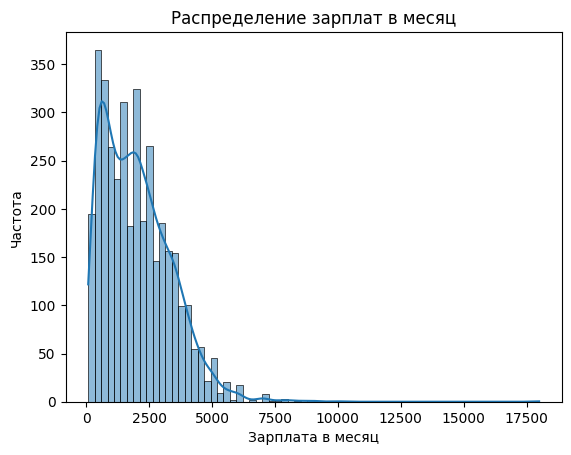

In [33]:
sns.histplot(data=my_data, x='Зарплата.в.месяц', kde=True)
plt.xlabel('Зарплата в месяц')
plt.ylabel('Частота')
plt.title('Распределение зарплат в месяц')
plt.show()